In [16]:
#看看数据集长什么样
import pandas as pd

df = pd.read_csv('pinglun.csv')

print(df)

      star                                            comment  lable
0        3                              賽車大場面夠炸，劇情不行，突然來了個弟弟。      0
1        4  8.1/10 除去被预告泄露过多的动作场面导致正片多少欠缺新意, 多线并行的叙事法造成些许混...      1
2        1  电影的艺术手法不是不允许夸张，但你实在不该骗我十二点看科幻片。\r\n看完我只想加入这个爱意...      0
3        2                                           我看的是万磁王？      0
4        1  看速激系列综合症：范迪塞尔巨石强森放一起分得清、分开了就不记得另一个长相，至今仍分不清See...      0
...    ...                                                ...    ...
4414     4                          新奇，喜欢。一群逗逼，凑活着居然拯救了银河系。哈哈      1
4415     4                                  喜欢喜欢喜欢。最后还是乖乖等彩蛋啊      1
4416     3                     看了黑贾翻译的评论才去的，一开始就马上进入六级听力考试状态。      0
4417     3                                再也不去影院看3d了，眼镜压得鼻子疼。      0
4418     5  过去没看（不看）这类电影的，80年代音乐?非常好听和怀旧。\r\n2023年5??借《银河3...      1

[4419 rows x 3 columns]


In [17]:
#上面的效果不好，用下面这种方式看
raw_data=pd.read_csv('pinglun.csv')
raw_data.head(10)

,star,comment,lable
0,3,賽車大場面夠炸，劇情不行，突然來了個弟弟。,0
1,4,"8.1/10 除去被预告泄露过多的动作场面导致正片多少欠缺新意, 多线并行的叙事法造成些许混...",1
2,1,电影的艺术手法不是不允许夸张，但你实在不该骗我十二点看科幻片。\r\n看完我只想加入这个爱意...,0
3,2,我看的是万磁王？,0
4,1,看速激系列综合症：范迪塞尔巨石强森放一起分得清、分开了就不记得另一个长相，至今仍分不清See...,0
5,3,这么老的IP，都拍了二十年了，你们咋不上天呢？（导演：好的）,0
6,3,在韩国看了全球首映，看完最想说：“太空行走，太他妈扯淡了！” 还有塞纳的屁股真翘！,0
7,1,调度乱得一塌糊涂。大量闪回似乎是为贴近该系列最初的街头飙车，但最终的效果像是山寨公司拍出来的...,0
8,3,系列的优点就是格局小，没事赛车／把妹，出事就只能跑路。现在动不动就要拯救世界。,0
9,4,就是很好奇那俩哥们怎么从太空回来的,1


In [18]:
#因为有label了，所以star其实没有用了，就把他删去，然后存入一个新的csv文件
f=df.drop(['star'],axis=1)
df.to_csv("pinglun_new.csv",index=False,encoding="utf-8")

In [19]:
raw_data=pd.read_csv('pinglun_new.csv')
raw_data.head(10)

,star,comment,lable
0,3,賽車大場面夠炸，劇情不行，突然來了個弟弟。,0
1,4,"8.1/10 除去被预告泄露过多的动作场面导致正片多少欠缺新意, 多线并行的叙事法造成些许混...",1
2,1,电影的艺术手法不是不允许夸张，但你实在不该骗我十二点看科幻片。\r\n看完我只想加入这个爱意...,0
3,2,我看的是万磁王？,0
4,1,看速激系列综合症：范迪塞尔巨石强森放一起分得清、分开了就不记得另一个长相，至今仍分不清See...,0
5,3,这么老的IP，都拍了二十年了，你们咋不上天呢？（导演：好的）,0
6,3,在韩国看了全球首映，看完最想说：“太空行走，太他妈扯淡了！” 还有塞纳的屁股真翘！,0
7,1,调度乱得一塌糊涂。大量闪回似乎是为贴近该系列最初的街头飙车，但最终的效果像是山寨公司拍出来的...,0
8,3,系列的优点就是格局小，没事赛车／把妹，出事就只能跑路。现在动不动就要拯救世界。,0
9,4,就是很好奇那俩哥们怎么从太空回来的,1


In [20]:
df=pd.read_csv('pinglun_new.csv')
#去重，把重复的去掉
print('去重之前：',df.shape[0])
df=df.drop_duplicates()
print('去重之后：',df.shape[0])
df.shape

去重之前： 4419
去重之后： 4292


(4292, 3)

In [64]:
print('数量： %d' %df.shape[0])
pos = sum(df['lable']== 1)
neg = sum(df['lable']== 0)
positive_labels = [[0,1] for _ in range(pos)]
negative_labels = [[0,1] for _ in range(neg)]
print('正样本:',pos)
print('负样本:',neg)

数量： 4292
正样本: 3108
负样本: 1184


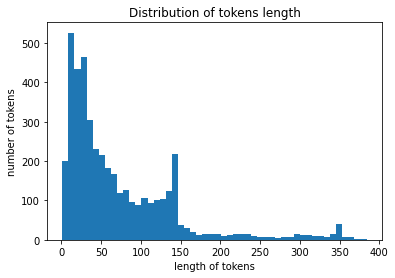

In [24]:
import matplotlib.pyplot as plt
num_tokens = [ len(str(tokens)) for tokens in df['comment'] ]

plt.hist(num_tokens, bins=50)
plt.ylabel('number of tokens')
plt.xlabel('length of tokens')
plt.title('Distribution of tokens length')
plt.show()

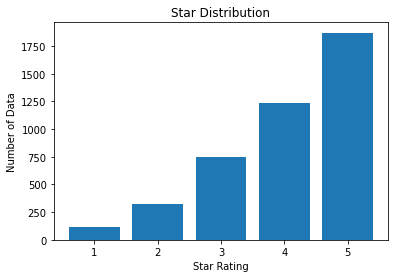

In [71]:
# 统计每个星级的数量
star_counts = df['star'].value_counts()

# 绘制柱状图
plt.bar(star_counts.index, star_counts.values)

# 添加标题和标签
plt.title('Star Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Number of Data')

# 显示图形
plt.show()

In [25]:
import pandas as pd
import codecs, gc
import numpy as np
from sklearn.model_selection import KFold
from keras_bert import load_trained_model_from_checkpoint, Tokenizer
from keras.metrics import top_k_categorical_accuracy
from keras.layers import *
from keras.callbacks import *
from keras.models import Model
import keras.backend as K
from keras.optimizers import adam_v2
from tensorflow.keras.utils import to_categorical
from sklearn import metrics
# 读取训练集和测试集
from sklearn.model_selection import train_test_split

In [26]:
# 参数配置
maxlen      = 40   # 设置序列长度为40，要保证序列长度不超过512
Batch_size  = 16    #批量运行的个数
Epoch       = 2     #迭代次数


In [49]:
def get_train_test_data():
    train_df = pd.read_csv(r'pinglun_new.csv' ).astype(str)
     
    # 训练数据、测试数据和标签转化为模型输入格式
    DATA_LIST = []
    for data_row in train_df.iloc[:].itertuples():
        DATA_LIST.append((data_row.comment, to_categorical(data_row.lable, 2)))
    DATA_LIST = np.array(DATA_LIST)

    data = DATA_LIST

    X_train,X_valid = train_test_split(data,test_size=0.2,random_state = 0)
    return X_train,X_valid 


In [50]:
# 预训练好的模型 bert base
config_path = 'bert_config.json'
checkpoint_path = 'bert_model.ckpt'
dict_path = 'vocab.txt'

In [51]:
def get_token_dict():
    """
    # 将词表中的字编号转换为字典
    :return: 返回自编码字典
    """
    token_dict = {}
    with codecs.open(dict_path, 'r', 'utf8') as reader:
        for line in reader:
            token = line.strip()
            token_dict[token] = len(token_dict)
    return token_dict

In [52]:
# 重写tokenizer
class OurTokenizer(Tokenizer):
    def _tokenize(self, text):
        R = []
        for c in text:
            if c in self._token_dict:
                R.append(c)
            elif self._is_space(c):
                R.append('[unused1]')  # 用[unused1]来表示空格类字符
            else:
                R.append('[UNK]')  # 不在列表的字符用[UNK]表示   UNK是unknown的意思
        return R
    

In [53]:
# 获取新的tokenizer
tokenizer = OurTokenizer(get_token_dict())

In [54]:
def seq_padding(X, padding=0):
    """
    :param X: 文本列表
    :param padding: 填充为0
    :return: 让每条文本的长度相同，用0填充
    """
    L = [len(x) for x in X]
    ML = max(L)
    return np.array([ np.concatenate([x, [padding] * (ML - len(x))]) if len(x) < ML else x for x in X])

In [55]:
class data_generator:
   
    def __init__(self, data, batch_size=Batch_size, shuffle=True):
        """
        :param data: 训练的文本列表
        :param batch_size:  每次训练的个数
        :param shuffle: 文本是否打乱
        """
        self.data = data
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.steps = len(self.data) // self.batch_size
        if len(self.data) % self.batch_size != 0:
            self.steps += 1

    def __len__(self):
        return self.steps

    def __iter__(self):
        while True:
            idxs = list(range(len(self.data)))

            if self.shuffle:
                np.random.shuffle(idxs)

            X1, X2, Y = [], [], []
            for i in idxs:
                d = self.data[i]
                text = d[0][:maxlen]
                x1, x2 = tokenizer.encode(first=text)
                y = d[1]
                X1.append(x1)
                X2.append(x2)
                Y.append([y])
                if len(X1) == self.batch_size or i == idxs[-1]:
                    X1 = seq_padding(X1)
                    X2 = seq_padding(X2)
                    Y = seq_padding(Y)
                    yield [X1, X2], Y[:, 0, :]
                    [X1, X2, Y] = [], [], []
             

In [56]:
# bert模型设置
def build_bert(nclass):
    """
    :param nclass: 文本分类种类
    :return: 构建的bert模型
    """
    bert_model = load_trained_model_from_checkpoint(config_path, checkpoint_path, seq_len=None)  # 加载预训练模型

    for l in bert_model.layers:
        l.trainable = True #True表示在训练期间模型层的权重会更新
    #构建模型
    x1_in = Input(shape=(None,))#初始化bert输入层的tensor
    x2_in = Input(shape=(None,))

    x = bert_model([x1_in, x2_in])
    x = Lambda(lambda x: x[:, 0])(x)  # 取出[CLS]对应的向量用来做分类
    p = Dense(nclass, activation='softmax')(x)

    model = Model([x1_in, x2_in], p)
    model.compile(loss='categorical_crossentropy',
                  optimizer=adam_v2.Adam(1e-5),  # 用足够小的学习率
                  metrics=['accuracy'])
    print(model.summary())
    return model


In [57]:
def run_kb():
    """
    训练模型
    :return: 验证预测集，测试预测集，训练好的模型
    """
    # 搭建模型参数
    print('正在加载模型，请耐心等待....')
    model = build_bert(2)  # 二分类模型
    print('模型加载成功，开始训练....')
    checkpoint = ModelCheckpoint(r'use_bert\bert_dump1.hdf5', monitor='val_acc', verbose=2,
                                 save_best_only=True, mode='max', save_weights_only=True)  # 保存最好的模型
    # 获取数据并文本序列化
    X_train, X_valid = get_train_test_data()
    train_D = data_generator(X_train, shuffle=True)
    valid_D = data_generator(X_valid, shuffle=True)
  
    # 模型训练
    model.fit_generator(
        train_D.__iter__(),
        steps_per_epoch=len(train_D),
        epochs=Epoch,
        validation_data=valid_D.__iter__(),
        validation_steps=len(valid_D),
        callbacks=[checkpoint],
        )
    # 对验证集和测试集进行预测
    valid_D = data_generator(X_valid, shuffle=False)
    train_model_pred = model.predict_generator(valid_D.__iter__(), steps=len(valid_D), verbose=1)
   
    # 将预测概率值转化为类别值
    train_pred = [np.argmax(x) for x in train_model_pred]
    y_true = [np.argmax(x) for x in X_valid[:, 1]]

    return train_pred,y_true,model

In [58]:
def bk_metrics(y_true,y_pred,type ='metrics'):
    """
    :param y_true: 真实值
    :param y_pred: 预测值
    :param type: 预测种类
    :return: 评估指标
    """
    print('准确率：',metrics.accuracy_score(y_true,y_pred))

In [59]:
if __name__ == '__main__':

    # 训练和预测
    train_pred, y_true,model = run_kb()

     

正在加载模型，请耐心等待....
Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 model_6 (Functional)           (None, None, 768)    101677056   ['input_3[0][0]',                
                                                                  'input_4[0][0]']                
                                                                                                  
 lambda_1 (Lambda)              (None, 768)          0           ['model_6[

C:\Users\lenovo\AppData\Local\Temp\ipykernel_173648\3604650180.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  DATA_LIST = np.array(DATA_LIST)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_173648\1070572619.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/2
221/221 [==============================] - 944s 4s/step - loss: 0.5019 - accuracy: 0.7627 - val_loss: 0.4434 - val_accuracy: 0.7986
Epoch 2/2
221/221 [==============================] - 737s 3s/step - loss: 0.3168 - accuracy: 0.8693 - val_loss: 0.4548 - val_accuracy: 0.7907


C:\Users\lenovo\AppData\Local\Temp\ipykernel_173648\1070572619.py:28: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  train_model_pred = model.predict_generator(valid_D.__iter__(), steps=len(valid_D), verbose=1)


56/56 [==============================] - 57s 941ms/step


In [60]:
#对测试集的评估
bk_metrics(train_pred,y_true,type =' train metrics')  

准确率： 0.7941176470588235


In [61]:
# 将模型保存
model_path =r'bertkeras_model.h5'
model.save(model_path)

In [69]:
from keras_bert import get_custom_objects
from keras.models import load_model
def bert_predict(text):
    # 模型加载与预测
    str = text
    custom_objects = get_custom_objects()
    model = load_model(model_path, custom_objects=custom_objects)
    DATA_text = []
    DATA_text.append((text, to_categorical(0, 2)))
    DATA_text = np.array(DATA_text)
    text= data_generator(DATA_text, shuffle=False)
    test_model_pred  = model.predict_generator(text.__iter__(), steps=len(text), verbose=1)
#     print('预测结果',test_model_pred)
    result = np.argmax(test_model_pred)
    if result==1:
        print("----------------------")
        print('评论内容：', str)
        print('预测评分：4星及以上')
        print('预测情感：正向')
        print('此条评价的预测情感结果为：正向')
    else:
        print("----------------------")
        print('评论内容：', str)
        print('预测评分：4星以下')
        print('预测情感：负向')

In [70]:
sentence1 = '虽然有巨石，实在太扯漏洞多得像筛子'
sentence2 = 'AWOSOME！看得我肾上腺激素爆发啊！！！'
sentence3 = 'FAST系列最喜欢的一季'
sentence4 = '今年最佳动作电影诞生'
sentence5 = '不爱鸡肉男不爱香车，到处找剧情bug，这电影看得累啊。'
sentence6 = '不出意外，这就是我的年度华语最佳了，无懈可击那种。'
sentence7 = '主题浮于表面…表达做作且矫情…警察局的戏份是把观众当傻逼吗…为什么要大早上来看一部青春伤痛文学式的狗血电影啊…四字dd演的倒还行'
bert_predict(sentence1)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_173648\546465545.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  DATA_text = np.array(DATA_text)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_173648\546465545.py:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_model_pred  = model.predict_generator(text.__iter__(), steps=len(text), verbose=1)


1/1 [==============================] - 4s 4s/step
----------------------
评论内容： 虽然有巨石，实在太扯漏洞多得像筛子
预测评分：4星以下
预测情感：负向
